<a href="https://colab.research.google.com/github/ibacaraujo/fastai-research/blob/master/research_lesson02_download.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research and development predicated on Lesson 02. Creating your own dataset from Google Images.

In [1]:
import fastai
fastai.__version__

'1.0.52'

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)
root_dir = '/content/gdrive/My Drive/'
base_dir = root_dir + 'fastai_research'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
from fastai.vision import *

## Get a list of URLs

### Search and Scroll

So, I am working towards a new weather dataset containing more types of weather. The categories are the six types: sunny, cloudy, rainy, windy, snowy, hazy.

My queries are similar with the following pattern: *weather* + weather + street.

I am interested in this kind of images.

### Download into file

For get the URLs from the search, we use the following commands.



```
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

So, I am doing this procedure six times, given that I have six weather conditions to get images from.

### Create directory and upload URLs file into your server

I will use the weather condition name as labels for the images.

In [0]:
folder = 'sunny'
file = 'urls_sunny.csv'

In [0]:
folder = 'cloudy'
file = 'urls_cloudy.csv'

In [0]:
folder = 'rainy'
file = 'urls_rainy.csv'

In [0]:
folder = 'windy'
file = 'urls_windy.csv'

In [0]:
folder = 'snowy'
file = 'urls_snowy.csv'

In [0]:
folder = 'hazy'
file = 'urls_hazy.csv'

In [0]:
# We run this cell for each category
path = Path(base_dir + '/datasets/weather2')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [17]:
path.ls()

[PosixPath('/content/gdrive/My Drive/fastai_research/datasets/weather2/sunny'),
 PosixPath('/content/gdrive/My Drive/fastai_research/datasets/weather2/cloudy'),
 PosixPath('/content/gdrive/My Drive/fastai_research/datasets/weather2/rainy'),
 PosixPath('/content/gdrive/My Drive/fastai_research/datasets/weather2/windy'),
 PosixPath('/content/gdrive/My Drive/fastai_research/datasets/weather2/snowy'),
 PosixPath('/content/gdrive/My Drive/fastai_research/datasets/weather2/hazy')]

Finally, I uploaded the files containing the URLs.

## Download images

Let's download our images. fast.ai has a function for that.

In [0]:
classes = ['sunny', 'cloudy', 'rainy', 'windy', 'snowy', 'hazy']

In [40]:
# We run this cell for each category as well.
download_images(path/file, dest, max_pics=200)

Error x-raw-image:///6642f14cc40f402e0da167afa42f5b3f72509a09ba3a4e4cde9fcefd71d9f240 No connection adapters were found for 'x-raw-image:///6642f14cc40f402e0da167afa42f5b3f72509a09ba3a4e4cde9fcefd71d9f240'
Error https://i.cbc.ca/1.4769450.1533115725!/fileImage/httpImage/image.JPG_gen/derivatives/16x9_780/hazy-clarence-lights.JPG HTTPSConnectionPool(host='i.cbc.ca', port=443): Read timed out. (read timeout=4)
Error x-raw-image:///ce9f454afc0f00c815a65b46cc0f3dce44716fb6c2ed6a012e70e31fd5e9e263 No connection adapters were found for 'x-raw-image:///ce9f454afc0f00c815a65b46cc0f3dce44716fb6c2ed6a012e70e31fd5e9e263'
Error x-raw-image:///fe4f9be2cbd02c04ea04b8fefff58539c5307db4a06ba4f31e8d526333543d71 No connection adapters were found for 'x-raw-image:///fe4f9be2cbd02c04ea04b8fefff58539c5307db4a06ba4f31e8d526333543d71'
Error https://i.prcdn.co/img?regionKey=NIxpkZCyetylJhKa1xrvZQ%3D%3D&scale=100 HTTPSConnectionPool(host='i.prcdn.co', port=443): Read timed out. (read timeout=4)
Error https://i

In [0]:
# If you have problems to download, try with 'max_workers=0' to see exceptions
# download_images(path/file, dest, max_pices=200, max_workers=0)

We can remove any images that can't be opened.

In [42]:
for c in classes:
  print(c)
  verify_images(path/c, delete=True, max_size=500)

sunny


cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai_research/datasets/weather2/sunny/00000088.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:967: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai_research/datasets/weather2/sunny/00000159.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai_research/datasets/weather2/sunny/00000155.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai_research/datasets/weather2/sunny/00000178.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:967: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai_research/datasets/weather2/sunny/00000193.jpg'>
cloudy


cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai_research/datasets/weather2/cloudy/00000031.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai_research/datasets/weather2/cloudy/00000040.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai_research/datasets/weather2/cloudy/00000075.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai_research/datasets/weather2/cloudy/00000120.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai_research/datasets/weather2/cloudy/00000139.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai_research/datasets/weather2/cloudy/00000149.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai_research/datasets/weather2/cloudy/00000165.png'>
cannot identify image file <_io.BufferedReader name='/content/

cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai_research/datasets/weather2/rainy/00000081.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai_research/datasets/weather2/rainy/00000144.jpg'>
windy


cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai_research/datasets/weather2/windy/00000052.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai_research/datasets/weather2/windy/00000127.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai_research/datasets/weather2/windy/00000122.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai_research/datasets/weather2/windy/00000166.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai_research/datasets/weather2/windy/00000170.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai_research/datasets/weather2/windy/00000190.jpg'>
snowy


cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai_research/datasets/weather2/snowy/00000063.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai_research/datasets/weather2/snowy/00000090.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai_research/datasets/weather2/snowy/00000106.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai_research/datasets/weather2/snowy/00000146.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai_research/datasets/weather2/snowy/00000191.jpg'>
hazy


cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai_research/datasets/weather2/hazy/00000016.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai_research/datasets/weather2/hazy/00000057.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai_research/datasets/weather2/hazy/00000162.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai_research/datasets/weather2/hazy/00000164.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai_research/datasets/weather2/hazy/00000179.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai_research/datasets/weather2/hazy/00000193.jpg'>


## View Data

Let's view the dataset created taking a look at some pictures.

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, 
                                  ds_tfms=get_transforms(), size=224, 
                                  num_workers=4).normalize(imagenet_stats)

In [44]:
data.classes

['cloudy', 'hazy', 'rainy', 'snowy', 'sunny', 'windy']

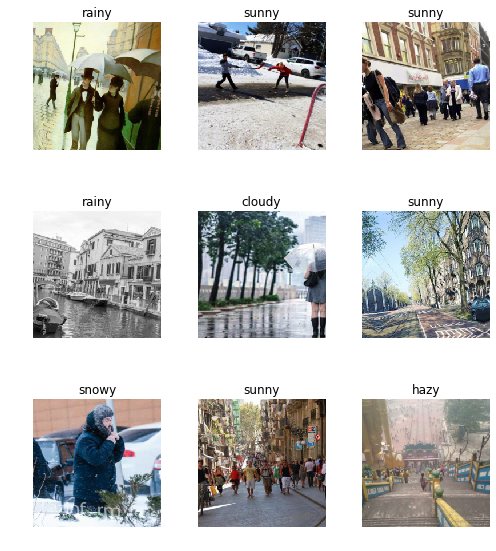

In [45]:
data.show_batch(rows=3, figsize=(7,8))

In [46]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['cloudy', 'hazy', 'rainy', 'snowy', 'sunny', 'windy'], 6, 912, 227)

## Train model

Let's train the model using a ResNet-34.

In [7]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 80428897.92it/s]


In [8]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.051319,1.511058,0.559471,01:43
1,1.684509,1.377114,0.444934,00:17
2,1.445308,1.333025,0.453745,00:16
3,1.296318,1.326505,0.462555,00:16


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [11]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


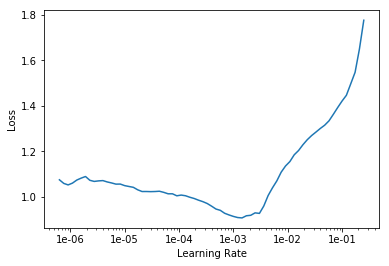

In [12]:
learn.recorder.plot()

In [13]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,1.025828,1.306913,0.440529,00:16
1,0.878860,1.289546,0.422908,00:17


In [0]:
learn.save('stage-2')

## Interpretation

In [0]:
learn.load('stage-2')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

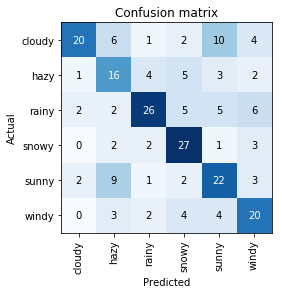

In [17]:
interp.plot_confusion_matrix()

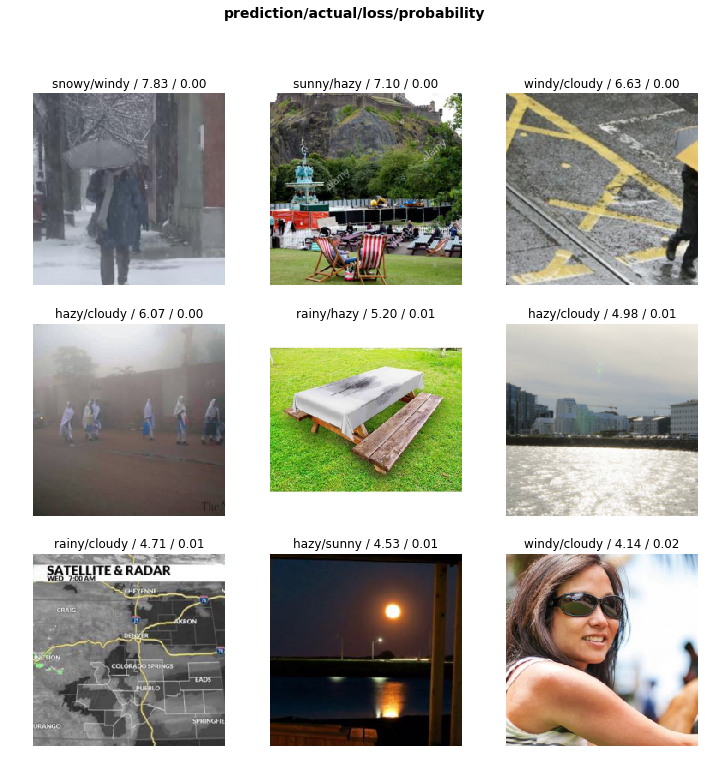

In [20]:
interp.plot_top_losses(9, heatmap=False)

## Cleaning Up

Some of our top losses aren't due to bad performance by our model. There are images in our data set that shouldn't be.

We can use  ```ImageCleaner``` widget from ```fastai.widgets``` to prune our top losses, removing phots that don't belong.



In [0]:
from fastai.widgets import *

In order to clean the entire set of images, we need to create a new dataset without the split.

In [23]:
db = (ImageList.from_folder(path)
               .no_split()
               .label_from_folder()
               .transform(get_transforms(), size=224)
               .databunch()
     )

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:171: UserWarning: `no_split` is deprecated, please use `split_none`.
  warn("`no_split` is deprecated, please use `split_none`.")


Then we create a new learner to use our new databunch with all the images.

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)
learn_cln.load('stage-2');

Now we can get the file paths from our ```top_losses``` using ```DatasetFormatter.from_toplosses```.

In [0]:
ds, idxs = DatasetFormatter.from_toplosses(learn_cln)

We then feed the top losses indexes and corresponding dataset to ```ImageCleaner```.

In [0]:
ImageCleaner(ds, idxs, path)

So, Google Colab in this moment does not support widgets, then I will do that manually.

Besides,  there is also a function  called ```from_similars``` to get the potential duplicates' ids. The process is similar to the one used above. I will do that manually as well.

## Putting model in production

To be done using Render, a new alternative described officially [here](https://course.fast.ai/deployment_render.html).

## Things that can go wrong

Most of the time things will train fine with the defaults. There is not much we really need to tune. It is more likely to tune learning rate and number of epochs.

A learning rate too high can not make your learning converge. A learning rate too low can slow down the training and do not achieve best results. Too few epochs can contribute to this same problem. Too many epochs can cause overfitting because it is getting too many looks at each image, so it may overfit.